In [7]:
import networkx as nx
import numpy as np

def kpathlaplacian(G, k):
    if k==1:
        L = nx.laplacian_matrix(G).toarray()
    else:
        nodelist= G.nodes()
        nsize = len(nodelist)
        L = np.zeros(shape=(nsize,nsize))
        i=1
        for n in nodelist:
            for m in nodelist[i:]:
                if((nx.shortest_path_length(G, source=n, target=m))==k):
                    L[n-1,m-1]= L[m-1,n-1]= -1
            i = i+1
            L[n-1,n-1] = np.sum(L[n-1]*-1)
    return L                       

In [8]:
import networkx as nx
import numpy as np

def kplaplacian(G):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= k
    row,col = np.diag_indices_from(L)
    L[row,col] = L.sum(axis=1)
    return L                       

In [9]:
import networkx as nx
import numpy as np

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L  

In [4]:
import networkx as nx
import itertools

G = nx.Graph()
e_list = [(1,2),(2,3),(2,5),(3,4),(4,5)]
G.add_edges_from(e_list)
ll = kplaplacian_ltf(G,1)
ll

array([[ 1.32045763, -1.        , -0.13533528, -0.04978707, -0.13533528],
       [-1.        ,  3.13533528, -1.        , -0.13533528, -1.        ],
       [-0.13533528, -1.        ,  2.27067057, -1.        , -0.13533528],
       [-0.04978707, -0.13533528, -1.        ,  2.18512235, -1.        ],
       [-0.13533528, -1.        , -0.13533528, -1.        ,  2.27067057]])

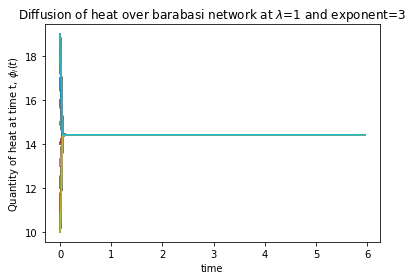

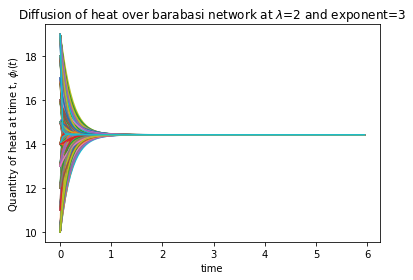

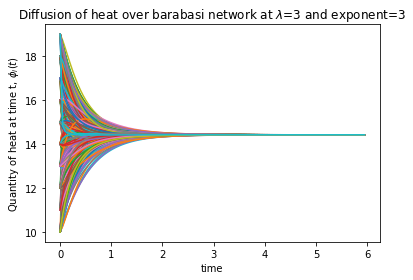

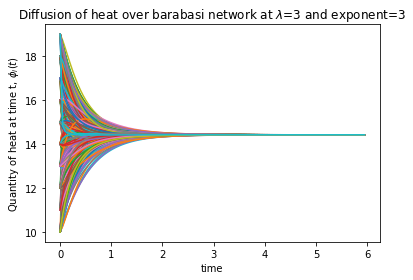

In [37]:
#Barabasi network with average degree ~6

import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(1000, 3)
n = len(G.nodes())
lam_vals = [1,2,3]

phi_0 = np.random.randint(10, 20,size=n)

for lam in lam_vals:
    L = kplaplacian_ltf(G,lam)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    time = np.arange(0,6,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
    plt.title('Diffusion of heat over barabasi network at $\lambda$='+str(lam)+' and exponent=3')
    plt.show()

l = nx.laplacian_matrix(G).todense()
D, V = LA.eigh(l);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,6,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
plt.title('Diffusion of heat over barabasi network at $\lambda$='+str(lam)+' and exponent=3')
plt.show()

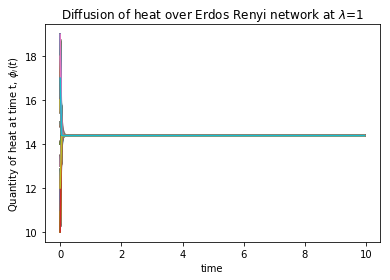

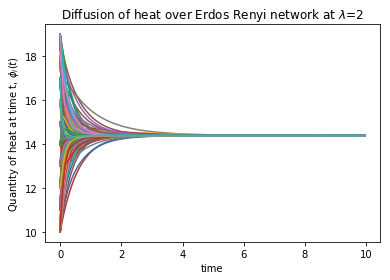

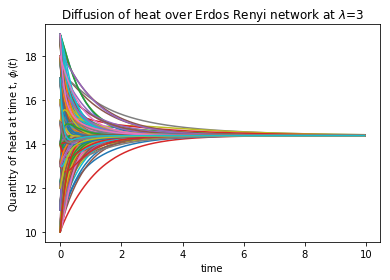

In [46]:
#erdos-renyi network with average degree ~6

import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

n = 1000
G = nx.erdos_renyi_graph(n, 0.006)
if (nx.is_connected(G)==True):

    phi_0 = np.random.randint(10, 20,size=n)

    for lam in lam_vals:
        L = kplaplacian_ltf(G,lam)

        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')
        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        time = np.arange(0,10,0.05)
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            phi_lst.append((Phi.ravel()).tolist())

        plt.plot(time,phi_lst)
        plt.xlabel('time')
        plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
        plt.title('Diffusion of heat over Erdos Renyi network at $\lambda$='+str(lam))
        plt.show() 

In [3]:
nfrom scipy import linalg as LA
L_1 =kpathlaplacian(G, k=1)
L_1
e_vals, e_vecs = LA.eig(L_1)
e_vals

SyntaxError: invalid syntax (<ipython-input-3-f7377e580deb>, line 1)

In [6]:
L_2 = kpathlaplacian(G, k=2)
L_2
e_vals, e_vecs = LA.eig(L_2)
e_vals

array([  3.00000000e+00+0.j,  -2.22044605e-16+0.j,   0.00000000e+00+0.j,
         2.00000000e+00+0.j,   3.00000000e+00+0.j])

In [7]:
L_3 = kpathlaplacian(G, k=3)
L_3
e_vals, e_vecs = LA.eig(L_3)
e_vals

array([ 2.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [8]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(4,5),(5,1)]
G.add_edges_from(e_list)

In [12]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals
L_1

array([[ 2, -1,  0,  0, -1],
       [-1,  2, -1,  0,  0],
       [ 0, -1,  2, -1,  0],
       [ 0,  0, -1,  2, -1],
       [-1,  0,  0, -1,  2]], dtype=int64)

In [11]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

array([[ 2.,  0., -1., -1.,  0.],
       [ 0.,  2.,  0., -1., -1.],
       [-1.,  0.,  2.,  0., -1.],
       [-1., -1.,  0.,  2.,  0.],
       [ 0., -1., -1.,  0.,  2.]])

In [15]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(3,5),(3,1)]
G.add_edges_from(e_list)

In [16]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals

array([  5.00000000e+00+0.j,   3.00000000e+00+0.j,  -2.19591591e-16+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j])

In [17]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

array([  4.00000000e+00+0.j,   2.00000000e+00+0.j,   4.07608960e-17+0.j,
         4.00000000e+00+0.j,   0.00000000e+00+0.j])

In [18]:
L_3 = kpathlaplacian(G, k=3)
e_vals, e_vecs = LA.eig(L_3)
e_vals

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [19]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(4,5),(5,1),(1,4),(2,5)]
G.add_edges_from(e_list)

In [20]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals

array([ 0.+0.j,  2.+0.j,  4.+0.j,  5.+0.j,  3.+0.j])

In [21]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

array([  3.00000000e+00+0.j,   1.00000000e+00+0.j,  -3.36770206e-17+0.j,
         2.00000000e+00+0.j,   0.00000000e+00+0.j])

In [14]:
G = nx.Graph()
e_lst =[(1,14),(1,4),(14,2),(14,5),(2,3),(2,6),(3,7),
       (4,5),(4,15),(5,8),(5,6),(6,9),(6,7),(7,10),
       (15,8),(15,11),(8,9),(8,12),(9,10),(9,13),(10,16),
       (11,12),(12,13),(13,16)]
G.add_edges_from(e_lst)

L_1 =kpathlaplacian(G, k=1)
L_1

array([[ 2,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  3, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0, -1,  2,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  3, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0, -1,  4, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0, -1,  0,  0, -1,  4, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0, -1,  3,  0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  4, -1,  0,  0, -1,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  0, -1,  4, -1,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0, -1,  3,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, -1,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  3, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  3,  0,  0, -1],
       [-1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,

In [10]:
L_1[13:,13:]

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 2]], dtype=int64)

In [13]:
L_u = L_1[:13, :13]
B_T = L_1[:13:,13:]
M1 = np.matrix([[1], [0],[0]])
R_hs = -B_T *M1
x_l1 = np.linalg.solve(L_u, R_hs)
x_l1

matrix([[ 0.70602978],
        [ 0.67112212],
        [ 0.54238148],
        [ 0.41205955],
        [ 0.53014888],
        [ 0.47098487],
        [ 0.41364084],
        [ 0.23755109],
        [ 0.26902766],
        [ 0.22755617],
        [ 0.07551392],
        [ 0.15102784],
        [ 0.1400185 ]])

In [15]:
L_2 =kpathlaplacian(G, k=2)
L_2

array([[ 3., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.],
       [-1.,  4.,  0.,  0., -1.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        -1.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,
        -1.,  0.,  0.],
       [-1., -1.,  0.,  0.,  6.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,
         0., -1.,  0.],
       [ 0.,  0., -1., -1.,  0.,  6.,  0., -1.,  0., -1.,  0.,  0., -1.,
        -1.,  0.,  0.],
       [ 0., -1.,  0.,  0., -1.,  0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0., -1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  6.,  0., -1., -1.,  0., -1.,
        -1.,  0.,  0.],
       [ 0., -1.,  0.,  0., -1.,  0., -1.,  0.,  6.,  0.,  0., -1.,  0.,
         0., -1., -1.],
       [ 0.,  0., -1.,  0.,  0., -1.,  0., -1.,  0.,  4.,  0.,  0., -1.,
         0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0

In [5]:
# directed 
import networkx as nx
import numpy as np

def laplacian_matrix_digraph(G, nodelist=None, weight='weight'):
    import scipy.sparse
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=weight,
                                  format='csr')
    n,m = A.shape
    diags = A.sum(axis=1)
    D = scipy.sparse.spdiags(diags.flatten(), [0], m, n, format='csr')
    return  D - A

def kpathlaplacian(G, k):
    if k==1:
        L = laplacian_matrix_digraph(G).toarray()
    else:
        nodelist= G.nodes()
        nsize = len(nodelist)
        L = np.zeros(shape=(nsize,nsize))
        i=1
        for n in nodelist:
            nlist_copy = nodelist
            for m in nlist_copy.remove(n):
                print(m)
                #if((nx.shortest_path_length(G, source=n, target=m))==k):
                    #L[n-1,m-1]= L[m-1,n-1]= -1
            #i = i+1
            #L[n-1,n-1] = np.sum(L[n-1]*-1)
    return L                       

In [6]:
import networkx as nx
import random
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

G = nx.DiGraph()
e_lst = [(1,0),(0,3),(2,1),(0,2),(4,0),(3,4)]
G.add_edges_from(e_lst)
kpathlaplacian(G, k=1)

array([[ 2,  0, -1, -1,  0],
       [-1,  1,  0,  0,  0],
       [ 0, -1,  1,  0,  0],
       [ 0,  0,  0,  1, -1],
       [-1,  0,  0,  0,  1]], dtype=int64)

In [7]:
G = nx.DiGraph()
e_lst = [(1,0),(0,3),(2,1),(0,2),(4,0),(3,4)]
G.add_edges_from(e_lst)
kpathlaplacian(G, k=2)

TypeError: 'NoneType' object is not iterable

In [3]:
import networkx as nx
from scipy import linalg as LA

G = nx.Graph()
e_lst = [(1,2),(2,3),(3,4),(4,5),(5,2)]
G.add_edges_from(e_lst)
L_1 = nx.laplacian_matrix(G)
e_vals, e_vecs = LA.eigh(L_1.todense())
e_vecs

array([[-4.47213595e-01,  8.11462211e-01,  0.00000000e+00,
        -3.17515788e-01, -2.01774144e-01],
       [-4.47213595e-01,  1.38018756e-01,  0.00000000e+00,
         5.36249932e-01,  7.02415001e-01],
       [-4.47213595e-01, -2.55974786e-01, -7.07106781e-01,
         2.42173667e-01, -4.19319477e-01],
       [-4.47213595e-01, -4.37531395e-01,  2.87079964e-16,
        -7.03081478e-01,  3.37998097e-01],
       [-4.47213595e-01, -2.55974786e-01,  7.07106781e-01,
         2.42173667e-01, -4.19319477e-01]])

In [6]:
e_vecs[:,1]

array([ 0.81146221,  0.13801876, -0.25597479, -0.43753139, -0.25597479])

In [12]:
import itertools

L_1 = kplaplacian_ltf(G,2)
e_vals, e_vecs = LA.eigh(L_1)
e_vecs

array([[-4.47213595e-01,  8.10737632e-01,  0.00000000e+00,
        -3.20497882e-01, -1.99963996e-01],
       [-4.47213595e-01,  1.38150430e-01, -3.77835160e-18,
         5.34373312e-01,  7.03817890e-01],
       [-4.47213595e-01, -2.53726816e-01, -7.07106781e-01,
         2.44006647e-01, -4.19622996e-01],
       [-4.47213595e-01, -4.41434431e-01,  1.24895408e-16,
        -7.01888725e-01,  3.35392099e-01],
       [-4.47213595e-01, -2.53726816e-01,  7.07106781e-01,
         2.44006647e-01, -4.19622996e-01]])

In [13]:
e_vecs[:,1]

array([ 0.81073763,  0.13815043, -0.25372682, -0.44143443, -0.25372682])